In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
X = pd.read_pickle("x1.pkl").drop(["wall", "roof", "floor"], axis=1)
y = pd.read_pickle("y1.pkl")

X.columns = ["Number of floors", 
             "Rectangular proportion", 
             "Orientation (Radians)", 
             "Floor area (sqm)", 
             "Glazing ratio",
             "Construction typology"]
y.columns = ["Energy"]



In [8]:
# In[ ]:





# In[4]:


def period_to_numeric(a):
    if a < 1919:
        return 1
    if a > 1918 and a < 1946:
        return 1
    if a > 1945 and a < 1961:
        return 3
    if a > 1960 and a < 1971:
        return 4
    if a > 1970 and a < 1981:
        return 5
    if a > 1980 and a < 1991:
        return 6
    if a > 1990 and a < 1996:
        return 7
    if a > 1995 and a < 2001:
        return 8
    if a > 2000 and a < 2006:
        return 9
    else:
        return 9


# In[5]:


from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.metrics import r2_score
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [9]:
X

Number of floors  Rectangular proportion  Orientation (Radians)  \
0                     2                       1               0.000000   
1                     5                       1               0.000000   
2                     8                       1               0.000000   
3                    11                       1               0.000000   
4                     2                       3               0.000000   
...                 ...                     ...                    ...   
63355                11                       3               2.356194   
63356                 2                       5               2.356194   
63357                 5                       5               2.356194   
63358                 8                       5               2.356194   
63359                11                       5               2.356194   

       Floor area (sqm)  Glazing ratio  Construction typology  
0                    50            0.0                      1  
1                    50            0.0                      1  
2                    50            0.0                      1  
3                    50            0.0                      1  
4                    50            0.0                      1  
...                 ...            ...                    ...  
63355               800            0.7                      9  
63356               800            0.7                      9  
63357               800            0.7                      9  
63358               800            0.7                      9  
63359               800            0.7                      9  

[63360 rows x 6 columns]

In [12]:
# In[6]:


with st.spinner("""This is an early design stage simulator and does not represent accurate design execution stage simulations"""):
    @st.cache_resource()  # 👈 Added this
    def r_():
        return model.fit(X, y)
    
et_r = r_()


# In[7]:


st.write("""
# Building Energy Simulation and Optimization for Lisbon, Portugal

This web app deploys a surrogate model developed with the EnergyPlus tool. 
The model can be used to predict the Annual energy use of a list of buildings and optimize a building's variables using the Genetic algorithm to minimize Annual Loads.
""")

st.write("---")


# In[8]:


c_tech = pd.read_csv("c_tech_area.csv").drop(["wall", "roof", "floor"], axis=1)


# In[9]:


c_tech.columns = ["Number of floors", 
                  "Rectangular proportion", 
                  "Orientation (Radians)", 
                  "Floor area (sqm)", 
                  "Glazing ratio",
                  "Construction typology", 
                  "Energy (kWh/sqm)"]


# In[10]:


st.write("Below you can download the Example upload file:")


# In[11]:


@st.cache_data
def convert_example(df):
    return df.to_csv().encode('utf-8')

example = convert_example(c_tech.drop("Energy (kWh/sqm)", axis=1))

st.download_button(
    label="Download sample data as CSV",
    data=example,
    file_name='example_upload.csv',
    mime='text/csv',)

st.write("---")


# In[12]:


typ = pd.read_csv("typologies.csv")


# In[13]:


typ.index = typ["Unnamed: 0"]


# In[14]:


final_typ = typ.drop("Unnamed: 0", axis=1).dropna(axis=1)


# In[15]:


final_typ.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9]


# In[16]:


final_typ.index.name = None


# In[17]:


st.write("Below are the construction typologies information that you can download via csv file:")
@st.cache_data
def convert_typologies(df):
    return df.to_csv().encode('utf-8')

typologies = convert_typologies(final_typ)

st.download_button(
    label="Download constructions as CSV",
    data=typologies,
    file_name='typologies_info.csv',
    mime='text/csv',)

st.write("---")


# In[18]:


upload = st.file_uploader("Input CSV file with all the buildings you want to test as seen in the example file above")


# In[19]:



#if simulate_button:


# In[20]:


if upload != None:
    preds = et_r.predict(pd.read_csv(upload).drop("Unnamed: 0", axis=1))
else:
    preds = et_r.predict(c_tech.drop("Energy (kWh/sqm)", axis=1))


# In[21]:


col_a, col_c, colb = st.columns(3)
simulate_button = col_c.button('Predict annual energy loads')


# In[22]:


import plotly.express as px
if simulate_button == True:

    df = pd.DataFrame(preds)
    df.columns = ["Energy (kWh/sqm)"]
    fig = px.histogram(df, x="Energy (kWh/sqm)", color_discrete_sequence=['indianred'])
    st.plotly_chart(fig)
    #fig.show()


# In[24]:


st.write("---")
st.subheader("Building design Optimization")
st.write("In this section you can select the design variables and their boundaries for a building and optimize its values for minimum annual energy loads")


# In[148]:


from platypus import *
#problem_types = [nfloor, prop, rot, area, wwr, mat]
cols = c_tech.drop(["Energy (kWh/sqm)"], axis=1).columns.values


# In[149]:


vars_user = np.array(st.multiselect("Select the design variables you wish to optimize:", cols, cols))


# In[150]:


2024-03-12 17:19:44.478 No runtime found, using MemoryCacheStorageManager
2024-03-12 17:19:44.490 No runtime found, using MemoryCacheStorageManager


In [13]:
vars_user

array(['Number of floors', 'Rectangular proportion',
       'Orientation (Radians)', 'Floor area (sqm)', 'Glazing ratio',
       'Construction typology'], dtype='<U22')

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


# In[163]:


problem_types = {"nfloor":-1, "prop":-1, "rot":-1, "area":-1, "wwr":-1, "mat":-1}

#nfloor variables
if "Number of floors" in vars_user:
    st.subheader("Number of floors - boundaries")
    problem_types["nfloor"] = Integer(st.slider("Minimum number of floors:", 1, 20, 1, 1), 
                                      st.slider("Maximum number of floors:", 1, 20, 11, 1))
    st.write("---")
else:
    st.subheader("Number of floors - constant")
    problem_types["nfloor"] = st.slider("Number of floors:", 1, 20, 1, 1)
    st.write("---")

#prop variables
if "Rectangular proportion" in vars_user:
    st.subheader("Rectangular proportion - boundaries")
    problem_types["prop"] = Real(st.number_input("Minimum rectangular proportion:", 1.00, 10.00, 1.00), 
                                 st.number_input("Maximum rectangular proportion:", 1.00, 10.00, 5.00))
    st.write("---")
else:
    st.subheader("Rectangular proportion - constant")
    problem_types["prop"] = st.slider("Rectangular proportion:", 1, 20, 1, 1)
    st.write("---")
    
#rot variables
if "Orientation (Radians)" in vars_user:
    st.subheader("Orientation (radians) - boundaries")
    problem_types["rot"] = Real(st.number_input("Minimum orientation angle (radians):", 0.00, 10.00, 0.00), 
                                 st.number_input("Maximum orientation angle (radians):", 0.00, 10.00, 3.14))
    st.write("---")
else:
    st.subheader("Orientation (Radians) - constant")
    problem_types["rot"] = st.number_input("orientation angle (radians):", 0.00, 10.00, 0.15)
    st.write("---")
    
#area variables
if "Floor area (sqm)" in vars_user:
    st.subheader("Floor area (sqm) - boundaries")
    problem_types["area"] = Real(st.number_input("Minimum floor area:", 20, 1000, 50), 
                                 st.number_input("Maximum floor area:", 20, 1000, 800))
    st.write("---")
else:
    st.subheader("Floor area (sqm) - constant")
    problem_types["area"] = st.number_input("Floor area:", 20, 1000, 20)
    st.write("---")
    
#wwr variables
if "Glazing ratio" in vars_user:
    st.subheader("Glazing ratio - boundaries")
    problem_types["wwr"] = Real(st.number_input("Minimum glazing ratio:", 0.00, 1.00, 0.1), 
                                 st.number_input("Maximum glazing ratio:", 0.00, 1.00, 0.7))
    st.write("---")
else:
    st.subheader("Glazing ratio - constant")
    problem_types["wwr"] = st.number_input("Glazing ratio:", 0.00, 1.00, 0.1)
    st.write("---")

if "Construction typology" in vars_user:
    st.subheader("Construction typologies:")
    mats = st.text_input("Input the construction typologies to consider:", "1, 2, 3, 4, 5, 6, 7, 8, 9")
    mats_arr_str = mats.split(",")
    mats_arr_int = [int(numeric_string) for numeric_string in mats_arr_str]
    mats_labels= le.fit_transform(mats_arr_int)
    problem_types["mat"] = Integer(0, len(mats_labels)-1)
    st.write("---")
else:
    st.subheader("Construction typology - constant")
    problem_types["mat"] = st.slider("Minimum number of floors:", 1, 9, 1, 1)
    st.write("---")


# In[164]:


platypus_vars = []

for t in problem_types:
    if "Real" in str(problem_types[t]) or "Integer" in str(problem_types[t]):
        platypus_vars.append(problem_types[t])


# In[165]:


def buildings_opt(x):
    problem = dict(problem_types)
    for i in problem:
        for j in enumerate(platypus_vars):
            if problem[i] == j[1]:
                problem[i] = x[j[0]]
                
    if "Construction typology" in vars_user:
        uncoded_mat = le.inverse_transform([x[len(platypus_vars)-1]])[0]
        
    df = pd.DataFrame([problem])
    #df.columns = c_tech.drop("Energy (kWh/sqm)", axis=1).columns
    pred = et_r.predict(df)[0]
    df["energy"] = pred
    df.to_csv(fname, mode="a", header=False, index=False)
    return [pred]

In [57]:
st.subheader("Optimization parameters:")
problem = Problem(len(platypus_vars), 1)
problem.types[:] = platypus_vars
problem.function = buildings_opt
variator = PM(probability=0.5, distribution_index=20.0)
itrs = st.number_input("Number of iterations you wish to test:", 200, value=5000)
pop = st.number_input("Number of populations you wish to test at a time:", 10, value=100)
sol = st.number_input("Number of optimum solutions you wish to obtain:", 10, value=100)


In [58]:
fname = "results_soo.csv"
algorithm = GeneticAlgorithm(problem, population_size=pop, offspring_size=sol, variator=variator)
algorithm.run(itrs)

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- area
- mat
- nfloor
- prop
- rot
- ...
Feature names seen at fit time, yet now missing:
- Construction typology
- Floor area (sqm)
- Glazing ratio
- Number of floors
- Orientation (Radians)
- ...

  warnings.warn(message, FutureWarning)
C:\Users\GRA\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarnin

In [53]:
global_arr= []
for s in algorithm.result:
    for v in enumerate(platypus_vars):
        if "Integer" in str(v[1]):
            global_arr.append(v[1].decode(s.variables[v[0]]))
        else:
            global_arr.append(round(s.variables[v[0]], 2))
    global_arr.append(s.objectives[0])
final = np.array(global_arr).reshape(len(algorithm.result), len(platypus_vars)+1)
final_df = pd.DataFrame(final)
final_df.columns = np.concatenate(([key for key in problem_types.keys() if "Real" in str(problem_types[key]) or "Integer" in str(problem_types[key])], ["Energy (kWh/sqm)"]))
if "Construction typology" in vars_user:
    final_df["mat"] = final_df["mat"].apply(lambda x: le.inverse_transform([int(x)])[0])


In [59]:
final_df

nfloor  prop   rot    area   wwr  mat  Energy (kWh/sqm)
0     10.0  1.00  1.57  796.58  0.10    7         25.065260
1     10.0  1.00  1.57  796.58  0.10    7         25.065260
2     10.0  1.00  1.57  796.58  0.10    7         25.065260
3     10.0  1.00  1.56  798.69  0.10    7         25.066613
4     10.0  1.00  1.52  797.02  0.10    7         25.080989
..     ...   ...   ...     ...   ...  ...               ...
95    10.0  1.09  1.59  726.78  0.14    7         26.089458
96    10.0  1.06  1.65  730.93  0.14    7         26.097387
97    10.0  1.13  1.38  580.98  0.10    7         26.098023
98    10.0  1.52  1.59  758.36  0.12    7         26.326614
99    10.0  1.00  1.65  664.90  0.12    7         26.461164

[100 rows x 7 columns]

In [60]:
import seaborn as sns

In [61]:
total_results = pd.read_csv(fname)

In [63]:
total_results.columns = final_df.columns

In [64]:
total_results

nfloor      prop       rot        area       wwr  mat  Energy (kWh/sqm)
0          4  3.825028  0.261702  443.541232  0.541284    6         47.897388
1          4  4.611993  2.014675  291.266717  0.652277    2         76.228865
2          1  2.549321  1.960713  412.036164  0.369914    7         50.708068
3          8  3.556015  2.732779  381.867772  0.239865    2         39.280021
4          4  1.081428  1.392525  753.782425  0.549897    2         41.954948
...      ...       ...       ...         ...       ...  ...               ...
5063      10  1.063502  2.968240  787.799850  0.100004    3         25.797149
5064      10  1.104000  2.995025  780.825210  0.100150    3         25.813067
5065      10  1.014856  3.140000  799.991993  0.100000    3         25.709250
5066      10  1.149736  2.971928  799.844984  0.150110    3         26.882377
5067      10  1.003027  3.096818  799.959600  0.103495    3         26.090911

[5068 rows x 7 columns]

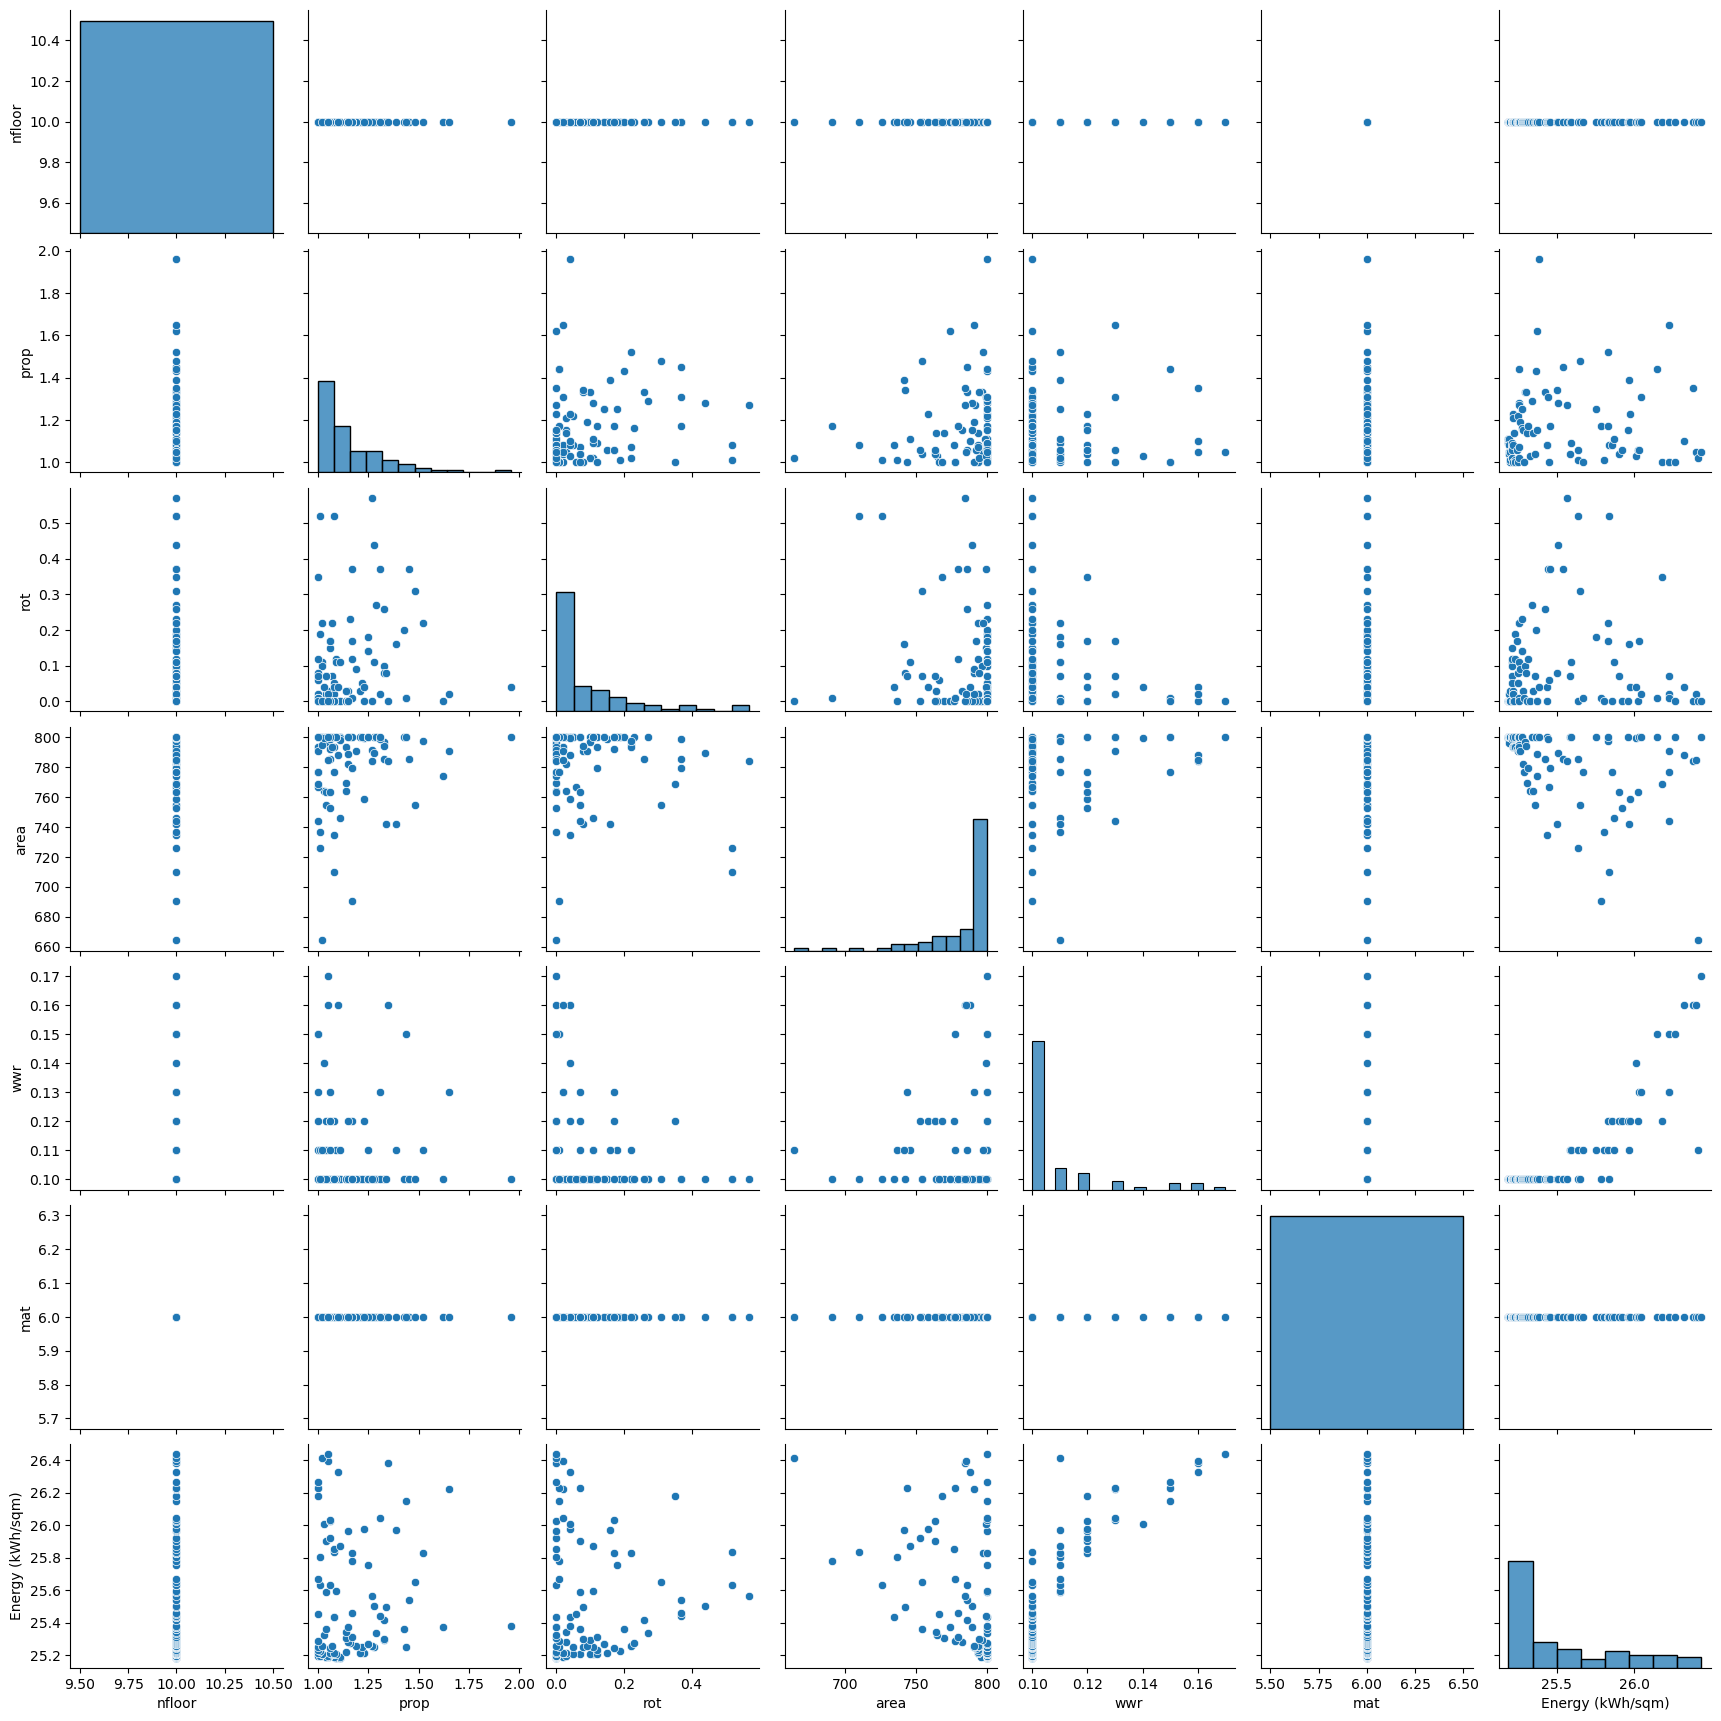

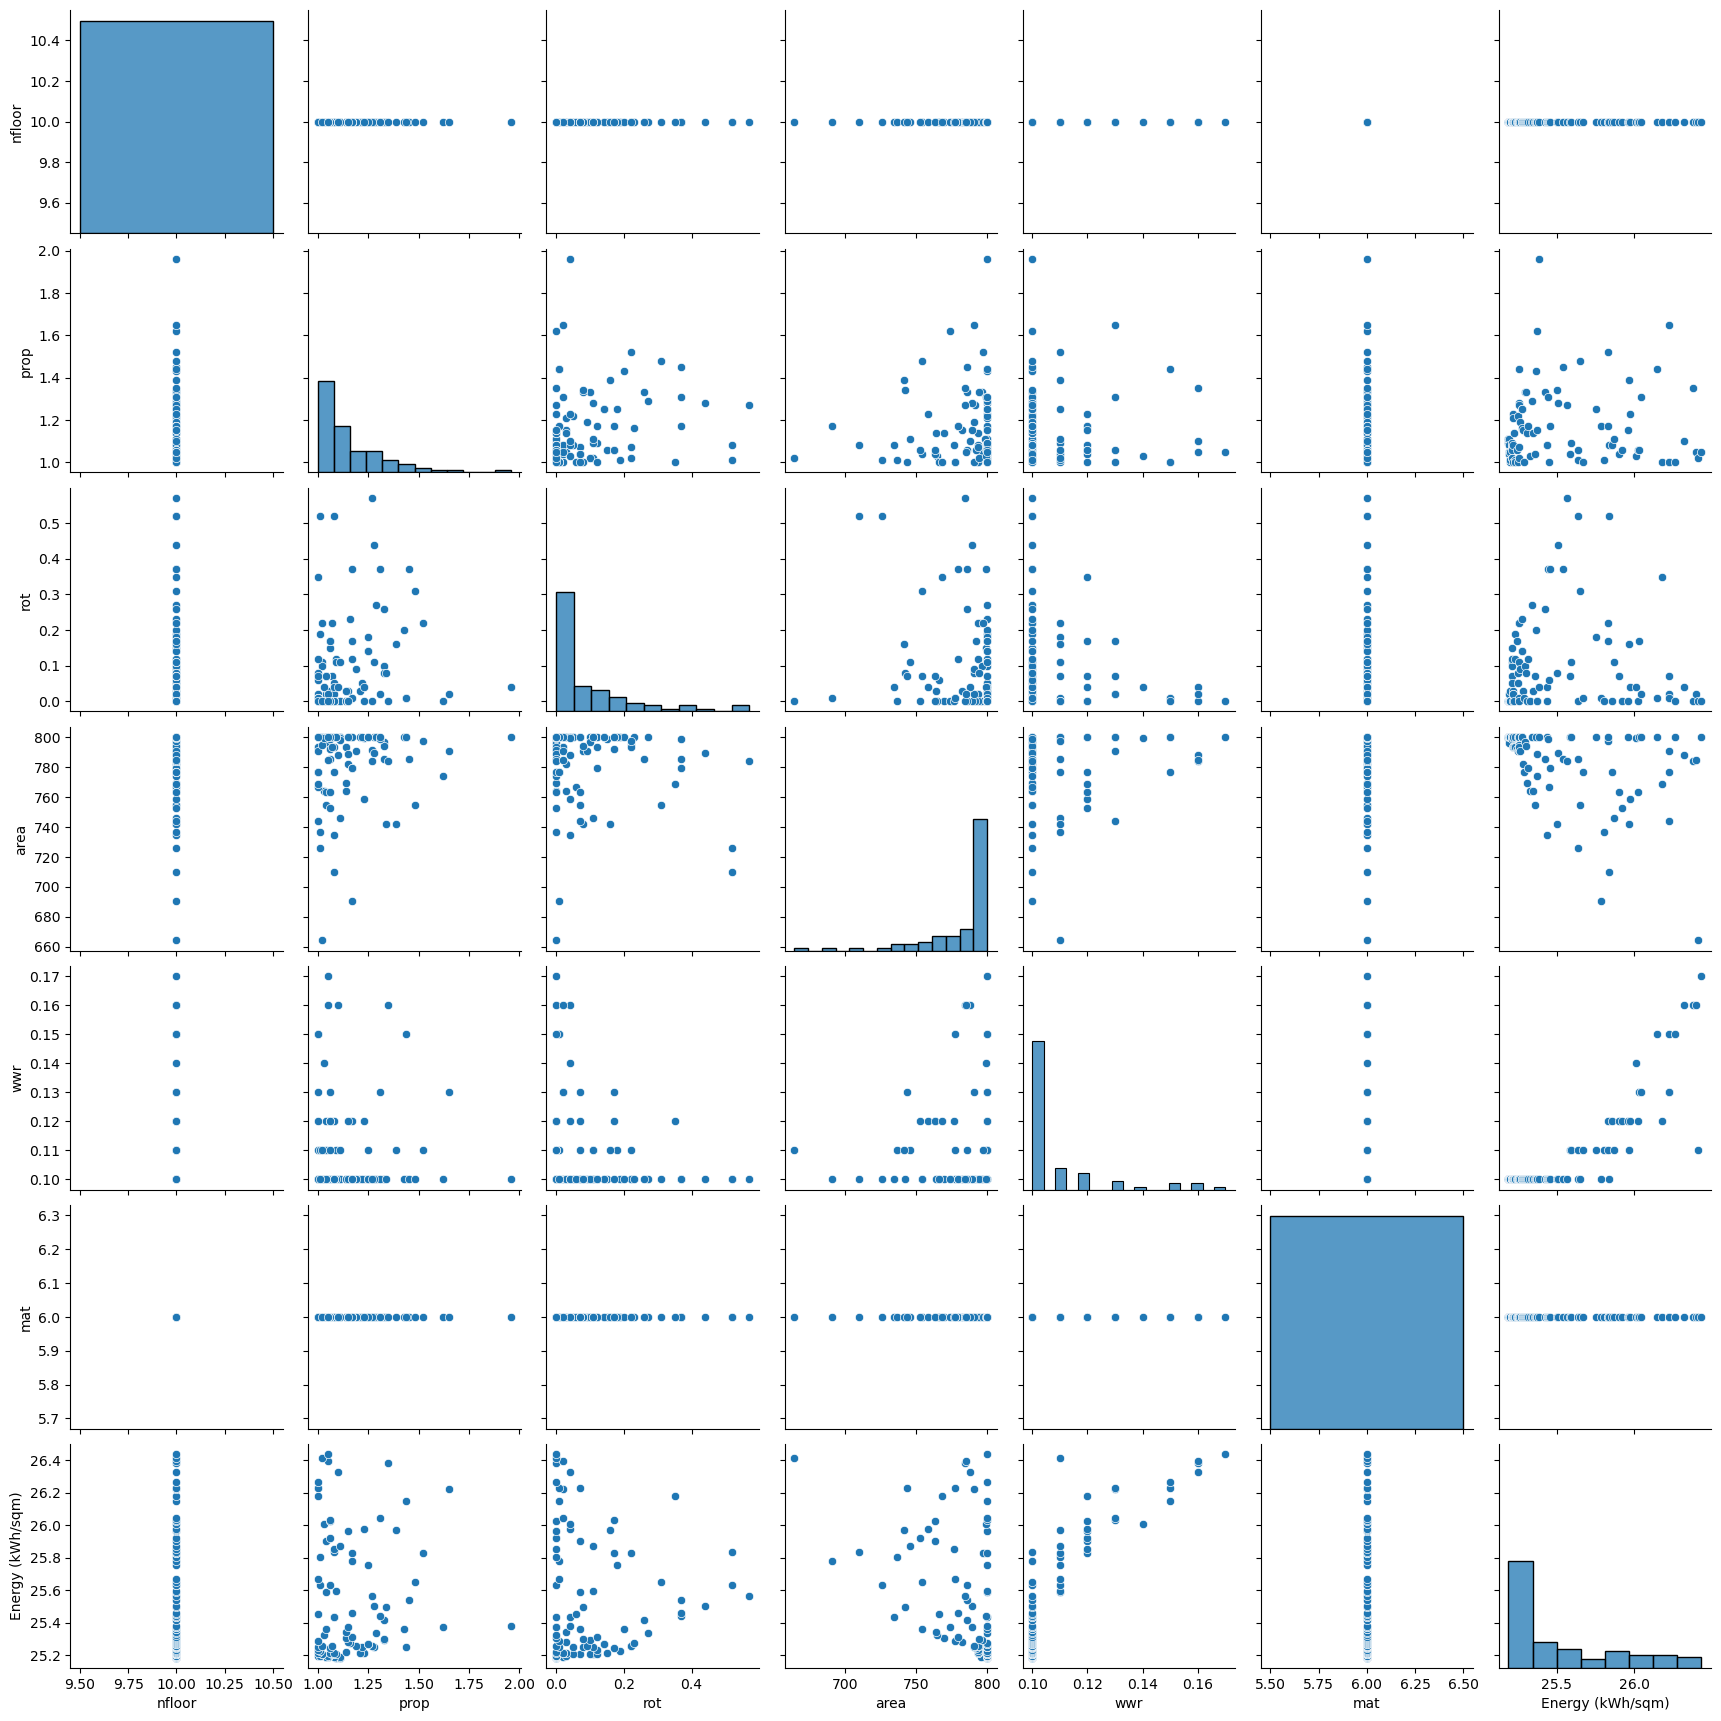

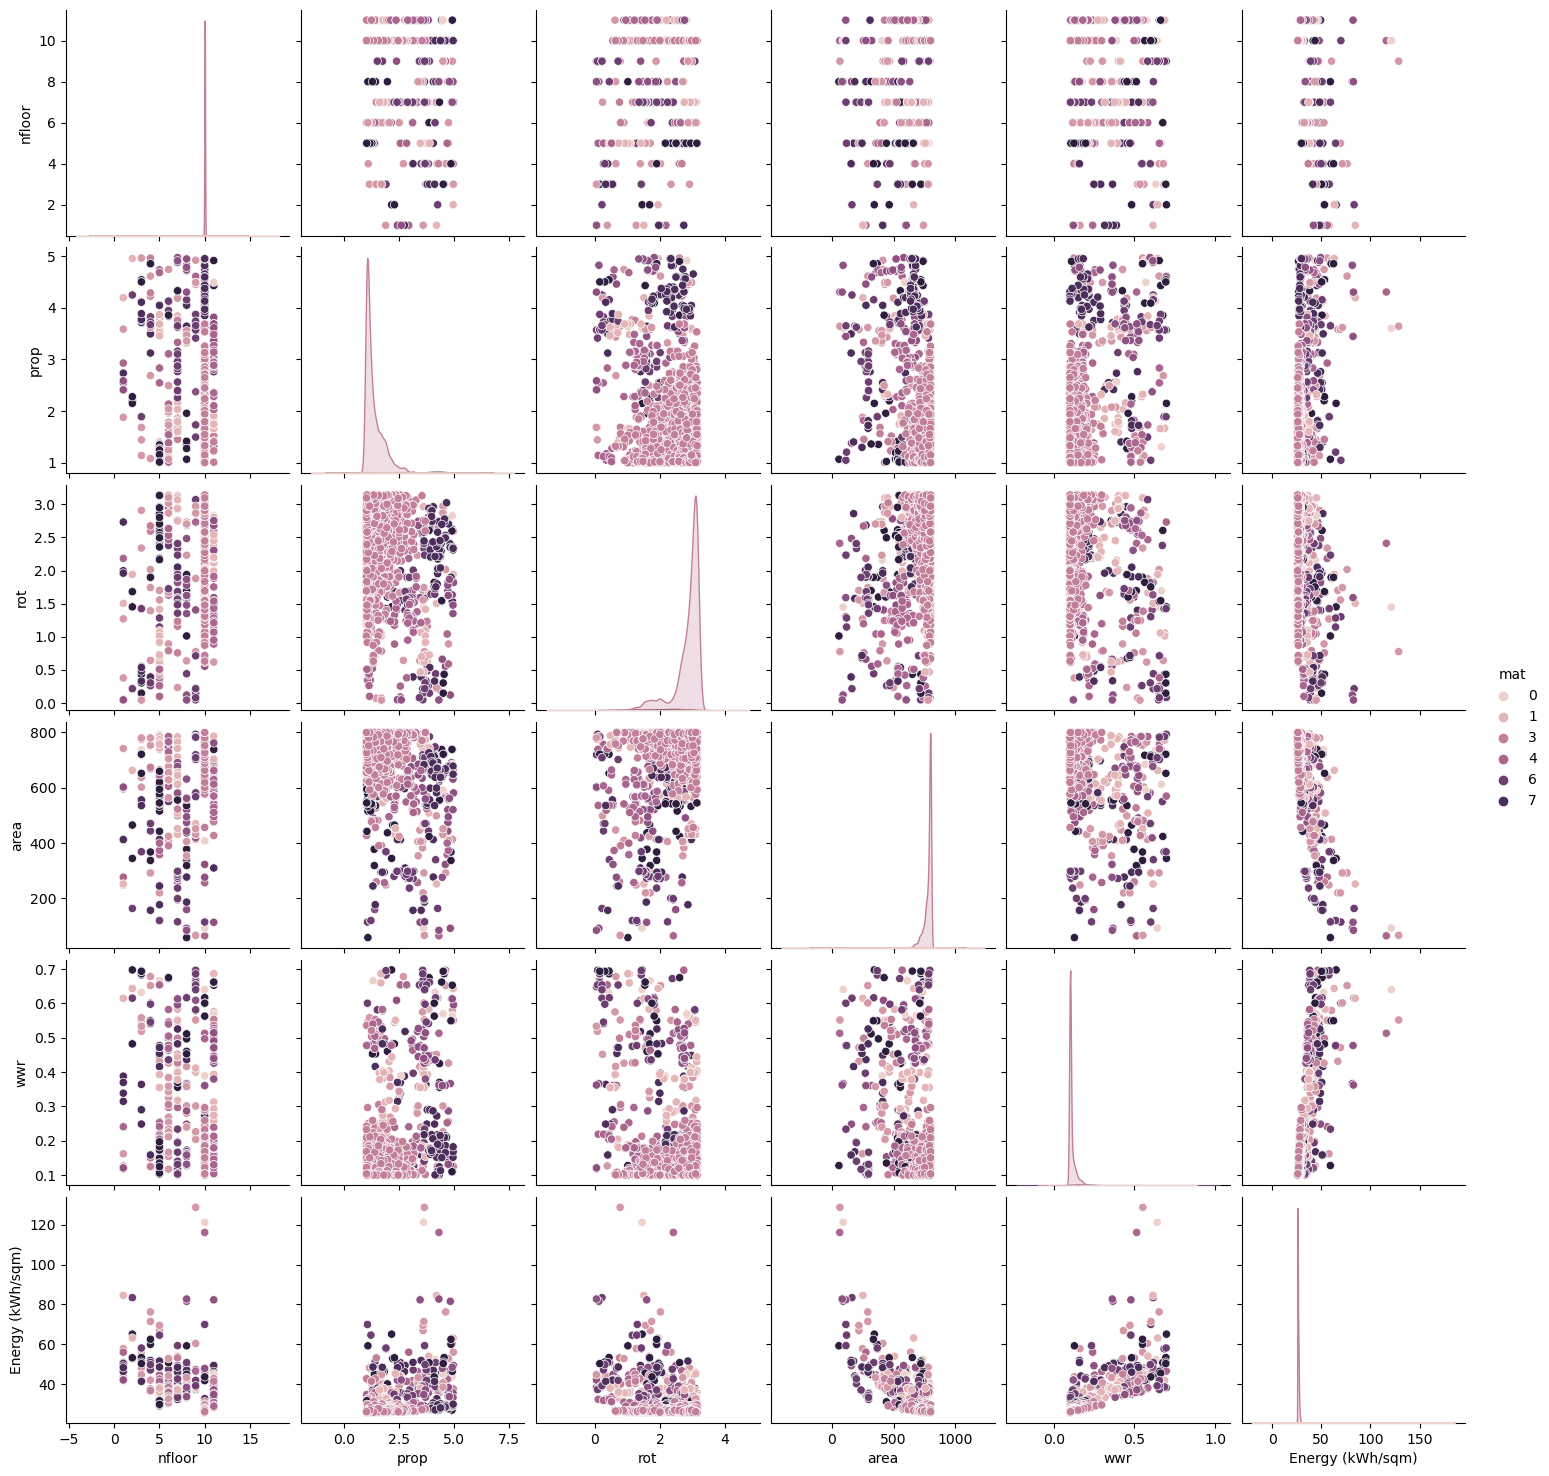

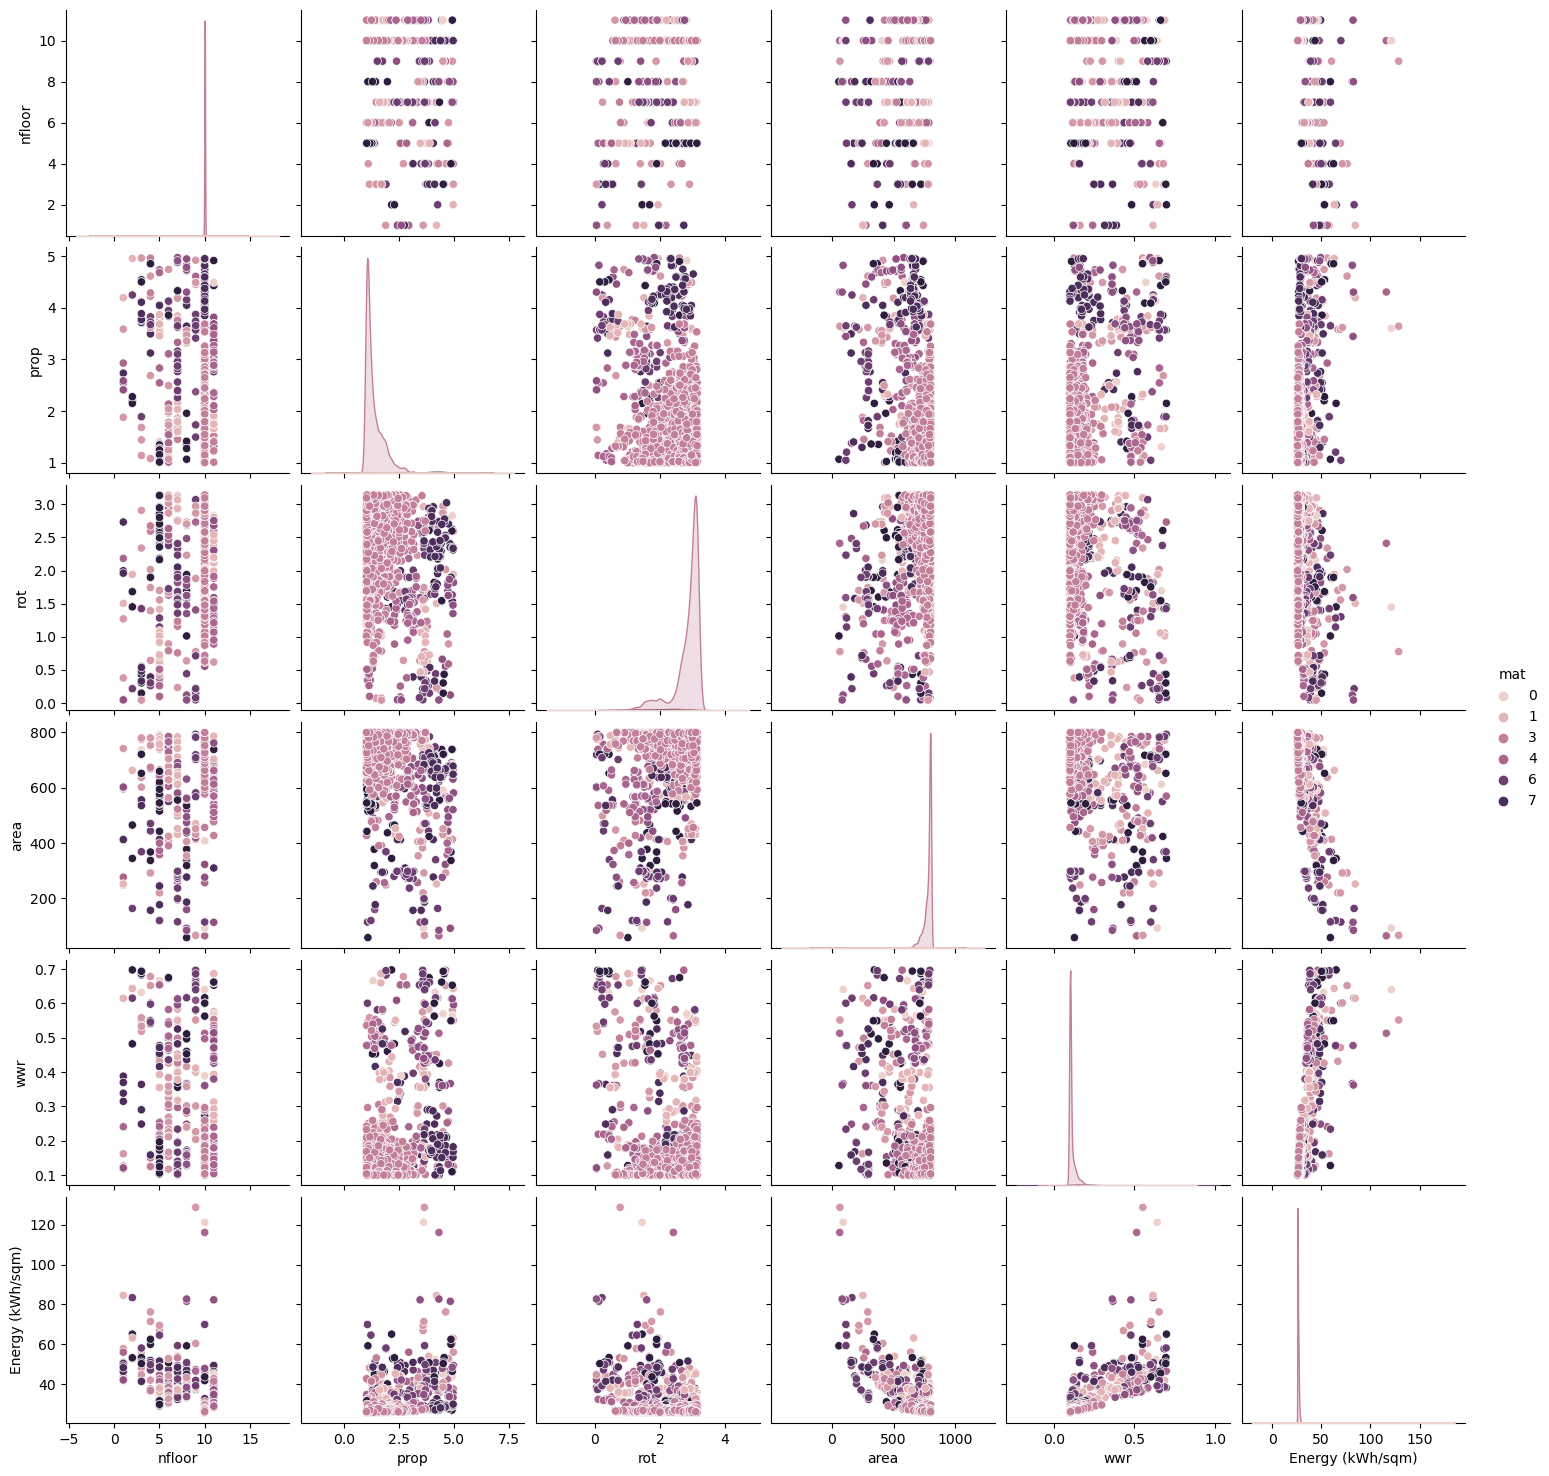

In [66]:
sns.pairplot(total_results, hue="mat")
plt.show()

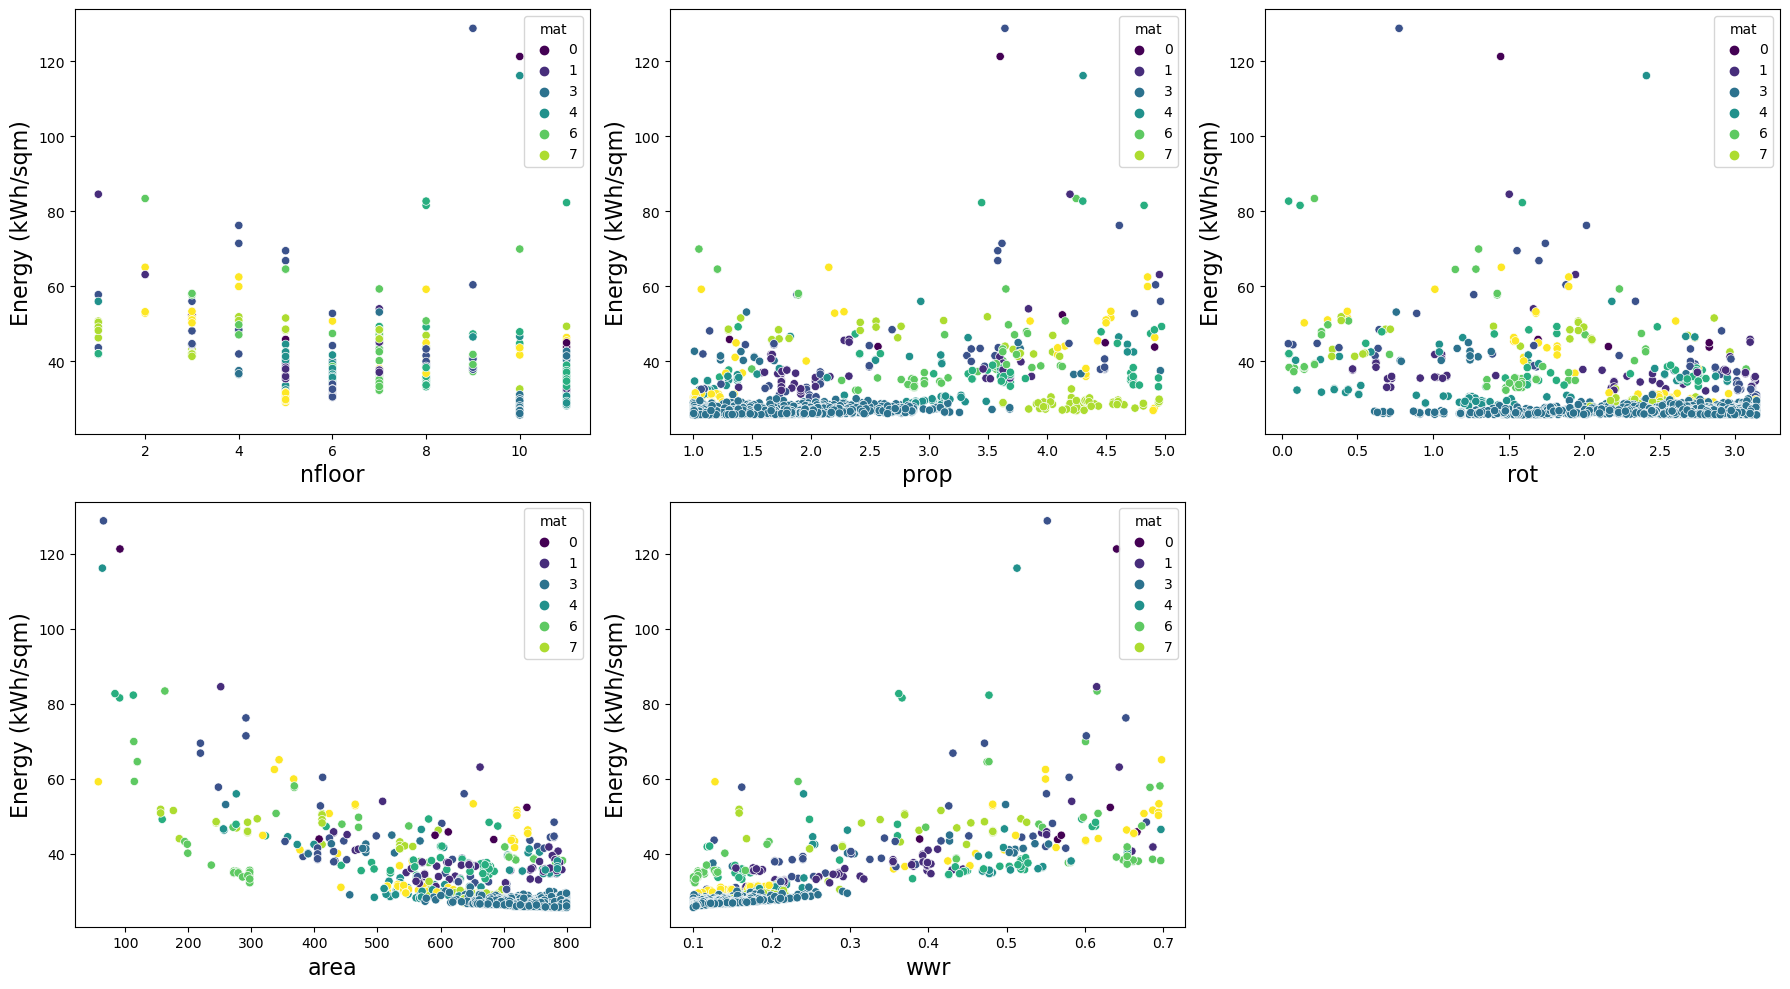

In [96]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Features to plot
features = ['nfloor', 'prop', 'rot', 'area', 'wwr']

# Iterate over features and plot scatter plots
for i, ax in enumerate(axes.flat):
    if i < len(features):
        sns.scatterplot(data=total_results, x=features[i], y='Energy (kWh/sqm)', hue='mat', ax=ax, palette="viridis")
        ax.set_xlabel(features[i], fontsize=16)
        ax.set_ylabel('Energy (kWh/sqm)', fontsize=16)
        #ax.set_title(f'Scatter plot for {features[i]}', fontsize=16)
    else:
        ax.axis('off')  # Turn off empty subplot

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [84]:
axes.flat

In [89]:
total_results["Energy (kWh/sqm)"].argmin()

4553

In [90]:
total_results.iloc[4553]

nfloor               10.000000
prop                  1.032953
rot                   3.140000
area                799.825708
wwr                   0.100000
mat                   3.000000
Energy (kWh/sqm)     25.708873
Name: 4553, dtype: float64